In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# fizz-buzz in deep learning (Keras)

http://joelgrus.com/2016/05/23/fizz-buzz-in-tensorflow/

*  input to be a number and output to be the correct "fizzbuzz" representation of that number.

In [11]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

In [25]:
def binary_encode(i, num_digits):
    """Convert to binary
    """
    return np.array([i >> d & 1 for d in range(num_digits)])


def fizz_buzz_encode(i):
    """ One-hot encoding of fizzbuzz representation of number
    """
    if   i % 15 == 0: return np.array([0, 0, 0, 1])
    elif i % 5  == 0: return np.array([0, 0, 1, 0])
    elif i % 3  == 0: return np.array([0, 1, 0, 0])
    else:             return np.array([1, 0, 0, 0])
    

def fizz_buzz(i, prediction):
    """ Print fizz-buzz
    """
    return [str(i), "fizz", "buzz", "fizzbuzz"][prediction]

In [6]:
# train it on all the remaining numbers up to 1024
NUM_DIGITS = 10
trX = np.array([binary_encode(i, NUM_DIGITS) for i in range(101, 2 ** NUM_DIGITS)])
trY = np.array([fizz_buzz_encode(i)          for i in range(101, 2 ** NUM_DIGITS)])

In [9]:
print(trX.shape)
trX

(923, 10)


array([[1, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [10]:
print(trY.shape)
trY

(923, 4)


array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [90]:
# This returns a tensor
inputs = Input(shape=(10,))

# a layer instance is callable on a tensor, and returns a tensor
NUM_HIDDEN = 200
x = Dense(NUM_HIDDEN, activation='relu')(inputs)
# x = Dense(NUM_HIDDEN, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [105]:
# Create model that includes Input layer and one Dense layer
BATCH_SIZE = 512

model = Model(inputs=inputs, outputs=predictions)

model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(trX, trY, batch_size=BATCH_SIZE, epochs=2000, verbose=0, validation_split=0.1)  # starts training

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               2200      
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 804       
Total params: 3,004
Trainable params: 3,004
Non-trainable params: 0
_________________________________________________________________


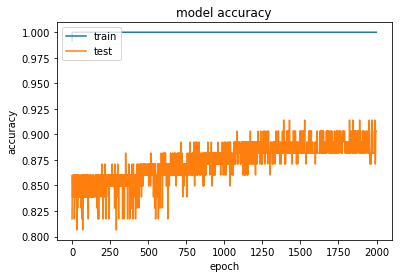

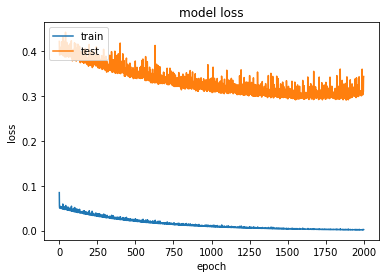

In [106]:
# summarize history for accuracy, display and save plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss, display and save plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
numbers = np.arange(1, 101)
teX = np.transpose(binary_encode(numbers, NUM_DIGITS))

In [108]:
teX

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0,

In [109]:
teY_val = model.predict(teX)
te_classvec_Y = teY_val.argmax(axis=-1)
teY = keras.utils.to_categorical(te_classvec_Y)
output = np.vectorize(fizz_buzz)(numbers, te_classvec_Y)

In [110]:
output

array(['1', 'buzz', 'fizz', '4', 'buzz', 'fizz', '7', '8', 'fizz', 'buzz',
       '11', 'fizz', '13', '14', 'fizzbuzz', '16', '17', 'fizz', '19',
       'buzz', 'fizz', '22', '23', 'fizz', 'buzz', '26', 'fizz', '28',
       '29', 'fizzbuzz', '31', 'buzz', 'fizz', 'fizz', 'buzz', 'fizz',
       '37', 'fizz', 'fizz', 'buzz', '41', 'fizz', '43', '44', 'fizzbuzz',
       '46', '47', 'fizz', '49', 'buzz', 'fizz', '52', 'buzz', 'fizz',
       'buzz', '56', 'fizz', '58', '59', 'fizzbuzz', '61', '62', 'fizz',
       '64', 'buzz', 'fizz', '67', 'fizz', 'fizz', 'buzz', '71', 'fizz',
       '73', '74', 'fizzbuzz', 'fizz', 'fizz', 'fizz', 'fizz', '80', '81',
       '82', '83', 'fizz', 'buzz', '86', 'fizz', '88', '89', 'fizzbuzz',
       '91', '92', 'fizz', '94', 'buzz', 'fizz', '97', 'fizz', 'fizz',
       'buzz'], dtype='<U8')

In [111]:
actuals = [fizz_buzz(i, fizz_buzz_encode(i).argmax()) for i in numbers]

for i, (predicted, actual) in enumerate(zip(output, actuals)):
    if predicted != actual:
        print("{0} {1} {2}".format(i+1, predicted, actual))

2 buzz 2
32 buzz 32
34 fizz 34
38 fizz 38
53 buzz 53
68 fizz 68
76 fizz 76
77 fizz 77
79 fizz 79
80 80 buzz
81 81 fizz
98 fizz 98
